## Population versus Sample Statistics

Below a data set is imported containing information about the 69 unique Pokemon in the first english language set printed in 1999 (the "base set").

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/prof-groff/evns-462/refs/heads/master/data/pokemon_baseset.csv')
data.head(10)

,Set,Name,Number,HP,Rarity
0,Base,Alakazam,1,80,Rare Holo
1,Base,Blastoise,2,100,Rare Holo
2,Base,Chansey,3,120,Rare Holo
3,Base,Charizard,4,120,Rare Holo
4,Base,Clefairy,5,40,Rare Holo
5,Base,Gyarados,6,100,Rare Holo
6,Base,Hitmonchan,7,70,Rare Holo
7,Base,Machamp,8,100,Rare Holo
8,Base,Magneton,9,60,Rare Holo
9,Base,Mewtwo,10,60,Rare Holo


Let's make a histogram showing the distribution of the HP for these Pokemon.

In [2]:
import matplotlib.pyplot as plt
plt.hist(data['HP'], bins=[20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

Does this data look normally distributed (bell-shaped curve)?

Since this data set contains ALL examples of Pokemon in the base set, it represents the **population** of base set Pokemon. Thus we can calculate population statistics for HP. 

In [3]:
import numpy as np
np.mean(data['HP'])

61.88405797101449

In [4]:
np.std(data['HP'])

22.668075125816983

We can also take a sample from this data set and calculate the mean and standard deviation of this sample.

In [5]:
sample3 = data.sample(3)
display(sample3)
sample6 = data.sample(6)
display(sample6)

,Set,Name,Number,HP,Rarity
58,Base,Poliwag,59,40,Common
50,Base,Koffing,51,50,Common
27,Base,Growlithe,28,60,Uncommon


,Set,Name,Number,HP,Rarity
25,Base,Dratini,26,40,Uncommon
2,Base,Chansey,3,120,Rare Holo
38,Base,Porygon,39,30,Uncommon
35,Base,Magmar,36,50,Uncommon
64,Base,Staryu,65,40,Common
13,Base,Raichu,14,80,Rare Holo


In [6]:
mean3 = np.mean(sample3['HP'])
print(mean3)

50.0


In [7]:
mean6 = np.mean(sample6['HP'])
print(mean6)

60.0


In [8]:
# note the use of ddof=1 here because these are standard deviations of samples with n-1 degrees of freedom
std3 = np.std(sample3['HP'], ddof=1)
std6 = np.std(sample6['HP'], ddof=1)
print(std3)
print(std6)

10.0
34.058772731852805


Now let's calculated 95% confidence intervals for these sample means using estimates for the standard error of the sample means.

In [9]:
se3 = std3/np.sqrt(3)
se6 = std6/np.sqrt(6)
print('For the n=3 sample we have xbar = ', np.round(mean3,2), ", 95% CI [", np.round(mean3-se3*1.96,2), ", ", np.round(mean3+se3*1.96,2), "]")
print('For the n=6 sample we have xbar = ', np.round(mean6,2), ", 95% CI [", np.round(mean6-se6*1.96,2), ", ", np.round(mean6+se6*1.96,2), "]")

For the n=3 sample we have xbar =  50.0 , 95% CI [ 38.68 ,  61.32 ]
For the n=6 sample we have xbar =  60.0 , 95% CI [ 32.75 ,  87.25 ]


If we sampled from this population repeatedly and built a histogram of the sample means we would have a sampling distribution or distribution of sample means.

In [10]:
xbars = np.zeros(200)
for ii in np.arange(0,200):
    xbars[ii] = np.mean(data.sample(3)['HP'])

Text(0, 0.5, 'Frequency')

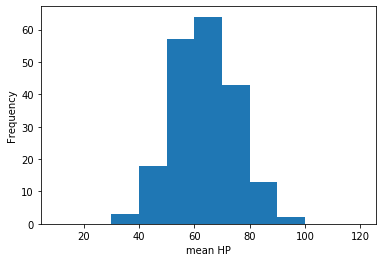

In [11]:
plt.hist(xbars,bins=[10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('mean HP')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

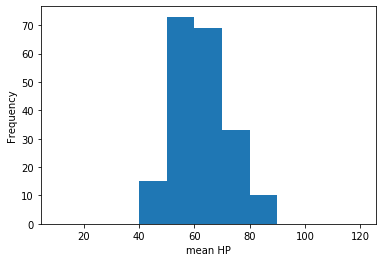

In [12]:
xbars = np.zeros(200)
for ii in np.arange(0,200):
    xbars[ii] = np.mean(data.sample(6)['HP'])
plt.hist(xbars,bins=[10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('mean HP')
plt.ylabel('Frequency')

Notice that the distribution of sample means is tighter (has less variance) when the sample size is larger. 